In [ ]:
# First we load all the necessary libraries that we will use in our model. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold


Since the data is no longer available in sklearn, we will import it after downloading from Kaggle using pandas. Thereafter, I will perform exploratory data analysis and preprocessing. Exploratory data analysis enables us to identify the general pattern of the data in the California housing dataset. So, we will be identifying any outliers and other unexpected features. 

In [199]:
data = "C:/Users/Admin/Downloads/housing.csv.zip"
df=pd.read_csv(data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The California housing dataset has 506 rows and 14 columns. We are now going to do an exploratory analysis for it. That includes statistics, data type, shape, and general information of the data

In [200]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [202]:
#data cleaning
df.isnull().values.any()


True

In [203]:
df.isnull().sum().sum()

207

The dataset has a total of 207 missing values in data

In [204]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [205]:
data= df.fillna(0)

After checking for missing values, we find out that our data has a lot of missing values in total_bedrooms

In [206]:
data.sample(n=100)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15238,-117.30,32.96,30.0,1226.0,205.0,380.0,151.0,4.2875,500001.0,NEAR OCEAN
6332,-117.95,33.99,24.0,1219.0,177.0,610.0,185.0,6.7978,325000.0,<1H OCEAN
10392,-117.66,33.57,16.0,2483.0,443.0,1357.0,400.0,5.5545,214200.0,<1H OCEAN
3995,-118.58,34.17,29.0,3393.0,574.0,1471.0,587.0,6.2064,334900.0,<1H OCEAN
16675,-120.70,35.14,17.0,5805.0,1097.0,1919.0,932.0,3.5352,357800.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
5253,-118.49,34.11,27.0,6603.0,879.0,2336.0,868.0,13.2935,500001.0,<1H OCEAN
20499,-118.71,34.30,23.0,1983.0,280.0,978.0,287.0,6.3199,236700.0,<1H OCEAN
3695,-118.39,34.20,17.0,2594.0,1028.0,3950.0,973.0,2.0348,177200.0,<1H OCEAN
8506,-118.30,33.88,30.0,1348.0,333.0,885.0,322.0,3.2574,195300.0,<1H OCEAN


In [207]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


So, we have used mean to fill in the missing values in our dataset. The next thing is to visualize this data using histogram, scatterplots, correlation matrix heatmap, then we can start training our dataset

In [216]:
X=data.drop(['ocean_proximity', 'median_house_value'],  axis=1)
y=data['median_house_value']

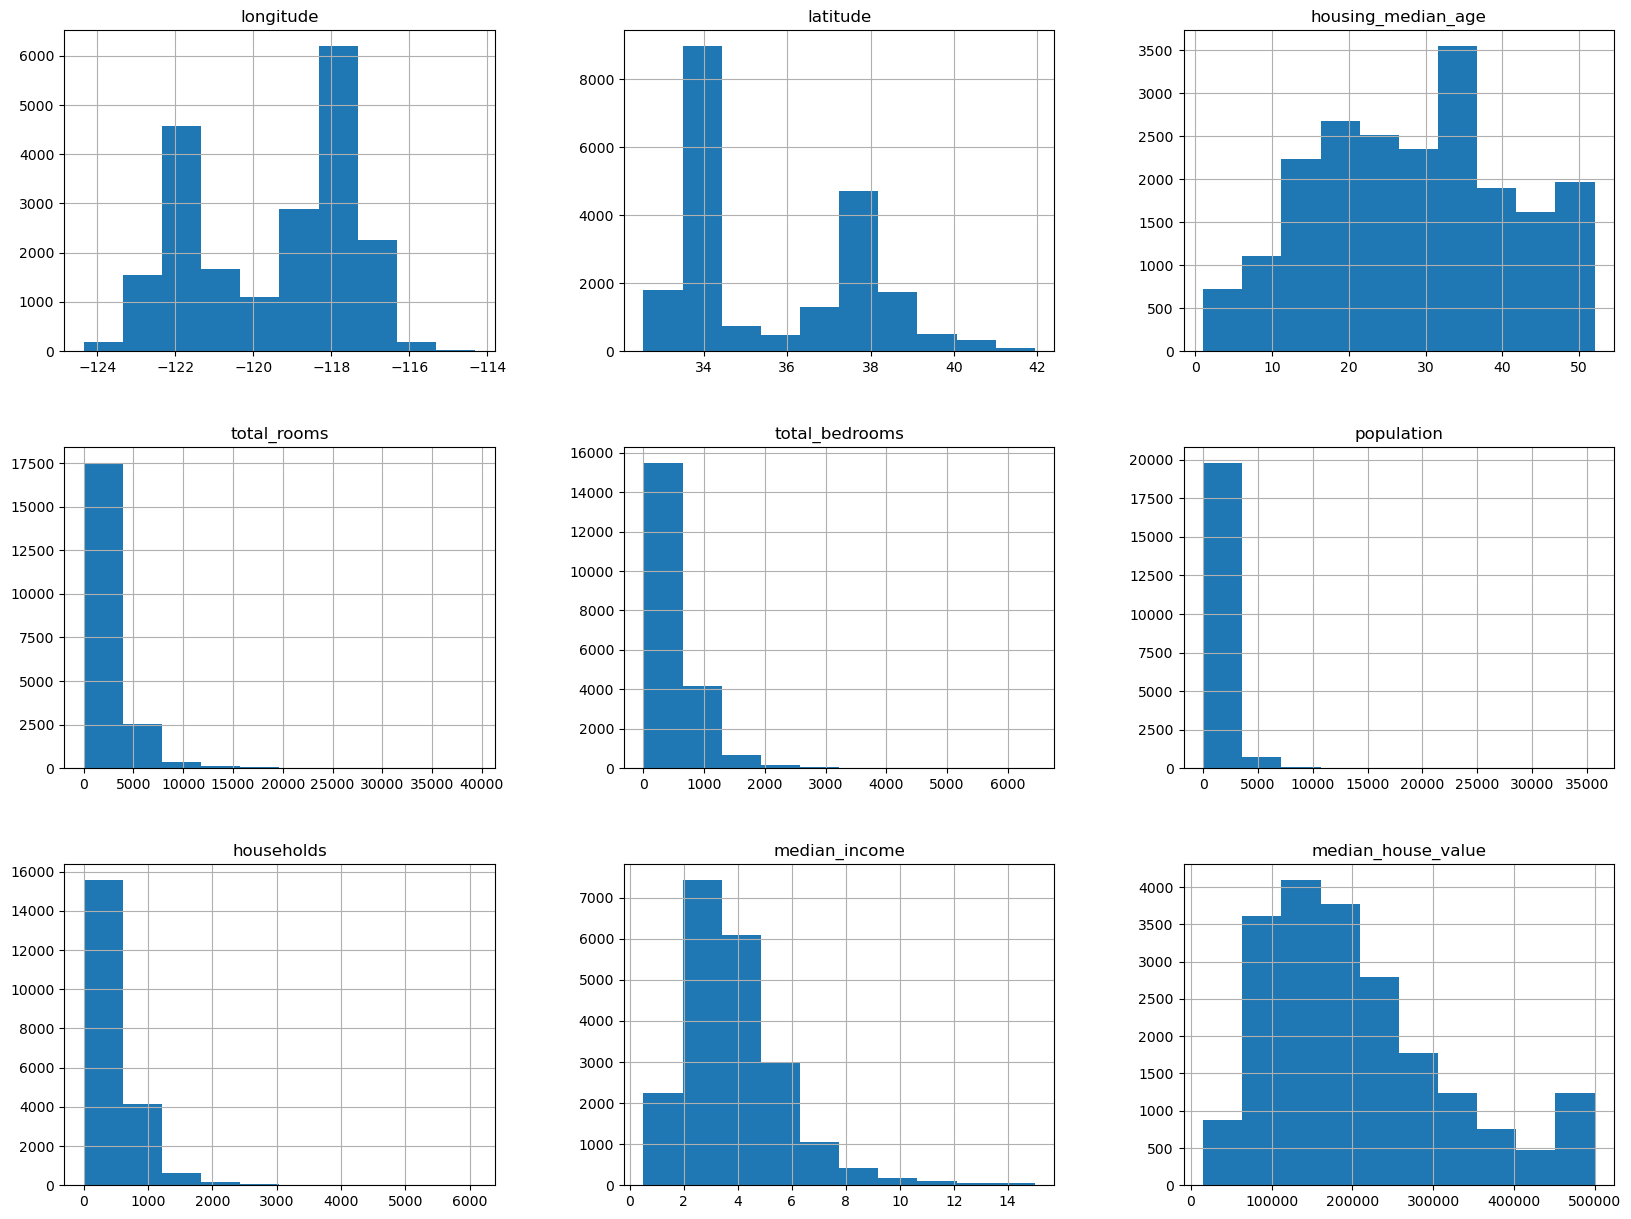

In [217]:
#histogram
data.hist(figsize=(20, 15))
plt.show()

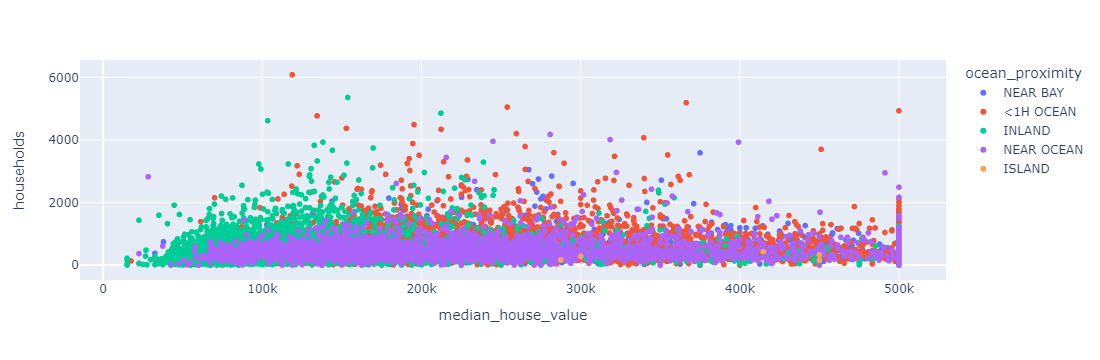

In [218]:
fig = px.scatter(data, x="median_house_value", y="households", color=data['ocean_proximity'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='ocean_proximity')

Insights
1. Many households are living near ocean with median house value between 100k and 300k
2. 5358 households are living INLAND with median_house value of 153.7K
3. 6082 households with median house value of 118.8k are living <1H ocean proximity
4. 4930 households ilve in median house value 500.001k at <1H OCEAN proximity
5. 4176 households with median house value of 280.8k live NEAR OCEAN
6. Many households living INLAND prefer houses with median house value of up to 200k

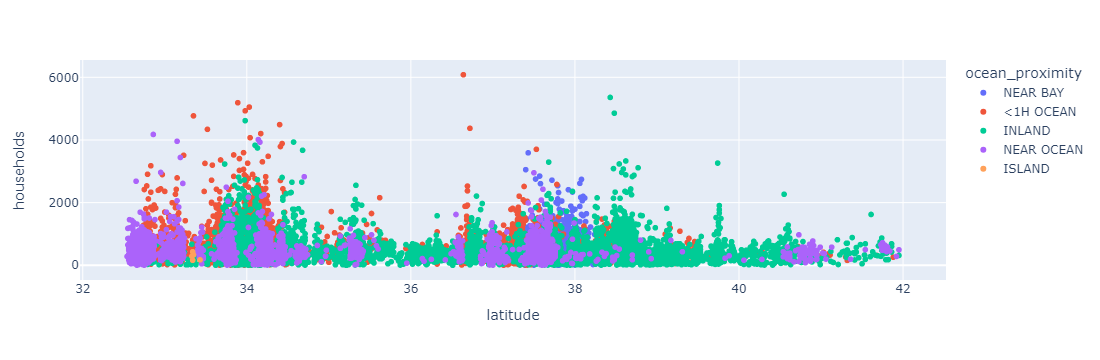

In [219]:
fig = px.scatter(data, x="latitude", y="households", color=data['ocean_proximity'],  color_continuous_scale='Blues')
fig.update_layout(legend_title_text='ocean_proximity')

1. Many households in ocean_proximity reside within latituse of 32 and 40
2. The highest number of  households  is 6082 residing in a latitude of 36.64 <1H OCEAN proximity
3. 5358 households reside at a latitude of 38.43 INLAND
4. 1622 households reside at a latitude of 41.61 INLAND
5. Most households with ocean proximity ISLAND reside below latitude of 34

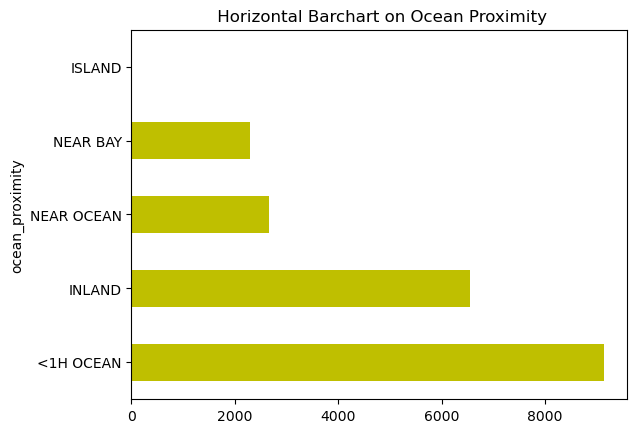

In [220]:
data["ocean_proximity"].value_counts().plot(kind="barh",color='y')
plt.title(' Horizontal Barchart on Ocean Proximity')
plt.show()

In [221]:
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [222]:
#Simple Linear Regression 
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root mse:",rmse)
print("r2 Score:", r2)



Mean Squared Error: 5248005521.732941
Mean Absolute Error: 52615.05867896109
Root mse: 72443.1192159265
r2 Score: 0.5995139220750845


In [223]:
# Implement Multiple Linear Regression
 #Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)#

Mean Squared Error: 5248005521.732941


In [224]:
poly_features = PolynomialFeatures(degree=2)

# Transform the input features to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the transformed training data
model.fit(X_train_poly, y_train)

# Make predictions on the transformed testing data
y_pred = model.predict(X_test_poly)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root mse:",rmse)
print("r2 Score:", r2)



Mean Squared Error: 6300054933.228398
Mean Absolute Error: 51720.618593089646
Root mse: 79372.88537799541
r2 Score: 0.5192298711440739


In [225]:
#Regularization Technique

# Create Ridge and Lasso regression models
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=1)

# Fit the models on the training data
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# Evaluate the models
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Ridge):", mse_ridge)
print("Mean Squared Error (Lasso):", mse_lasso)

Mean Squared Error (Ridge): 5247932823.388305
Mean Squared Error (Lasso): 5247975615.709686


In [226]:
#Support Vector Regression

# Create a support vector regression model (RBF kernel)
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit the model on the training data
svr.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root mse:",rmse)
print("r2 Score:", r2)

Mean Squared Error: 13741326822.96621
Mean Absolute Error: 87341.47639172236
Root mse: 117223.40561068089
r2 Score: -0.04862886710472969


In [227]:
#Decision Tree

# Create a decision tree regression model
dtree = DecisionTreeRegressor(max_depth=3, random_state=42)

# Fit the model on the training data
dtree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dtree.predict(X_test)

# Evaluate the model

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root mse:",rmse)
print("r2 Score:", r2)

Mean Squared Error: 6853709184.169017
Mean Absolute Error: 61319.63997443949
Root mse: 82787.13175469372
r2 Score: 0.47697937834877524


In [228]:
#Random Forest

# Create a random forest regression model
rforest = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)

# Fit the model on the training data
rforest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rforest.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root mse:",rmse)
print("r2 Score:", r2)

Mean Squared Error: 6558125565.959923
Mean Absolute Error: 59831.81458340519
Root mse: 80982.2546361851
r2 Score: 0.4995359712230004


In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a random forest regressor
rforest = RandomForestRegressor(random_state=42)

# Instantiate the grid search with cross-validation
grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best combination of hyperparameters and their score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

In [ ]:
from random import randint

param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 30),
    'min_samples_split': randint(2, 10)
}

# Create a random forest regressor
rforest = RandomForestRegressor(random_state=42)

# Instantiate the randomized search with cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(estimator=rforest, param_distributions=param_dist, n_iter=50, cv=kfold, scoring='neg_mean_squared_error', random_state=42)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Print the best combination of hyperparameters and their score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

In [ ]:
import seaborn as sns

sns.scatterplot(
    data=data,
    x="longitude",
    y="latitude",
    size="housing_median_age",
    hue="housing_median_age",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="housing_median_age", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_= plt.title("Median house value depending of\n their location")

In [ ]:
#advanced scatter plot using median value of house
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
         s=data["population"]/100,label="population",
         c="median_house_value",cmap=plt.get_cmap("jet"),
         colorbar=True)
plt.legend()

In [ ]:
#scatter matrix fom pandas

from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(data[attributes],figsize=(12,8))

In [ ]:
model_names = ['Simple LR', 'Multiple LR', 'Polynomial LR', 'Ridge', 'Lasso', 'SVR', 'Decision Tree', 'Random Forest', 'Tuned Random Forest']
metrics_list = [simple_lr_metrics, multiple_lr_metrics, poly_lr_metrics, ridge_metrics, lasso_metrics, svr_metrics, dtree_metrics, rforest_metrics, best_rforest_metrics]

results = pd.DataFrame(metrics_list, columns=['MAE', 'MSE', 'RMSE', 'R2'], index=model_names)
print(results)

In [ ]:
correlations = data.corr()
correlations["median_house_value"].sort_values(ascending=False)